In [19]:
import torch
import matplotlib.pyplot as plt
import tqdm

import sys
sys.path.append('../')
from model import nn_tools
from utils import utils

In [20]:
gamma_min=-13.3
gamma_max=5.0

In [21]:
gamma_schedule=nn_tools.NNSchedule(gamma_min,gamma_max)

In [32]:
ts=torch.linspace(0,1,100)
#overfit to some schedule
gamma_overfit=torch.sigmoid(5*ts) #this sigmoid is just to give some sort of non linearity
gamma_overfit=gamma_overfit*(gamma_max-gamma_min)+gamma_min

In [33]:
losses=[]

In [34]:
n_steps=3000
opt=torch.optim.Adam(gamma_schedule.parameters(),lr=0.01)
for i in tqdm.tqdm(range(n_steps)):
    loss=torch.sum((gamma_schedule(ts[:,None])[:,0]-gamma_overfit)**2)
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(loss.item())

100%|██████████| 3000/3000 [00:04<00:00, 674.62it/s]


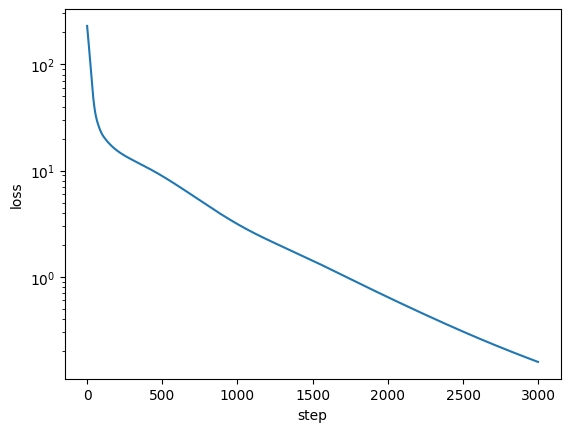

In [35]:
plt.plot(losses)
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('step')
plt.show()

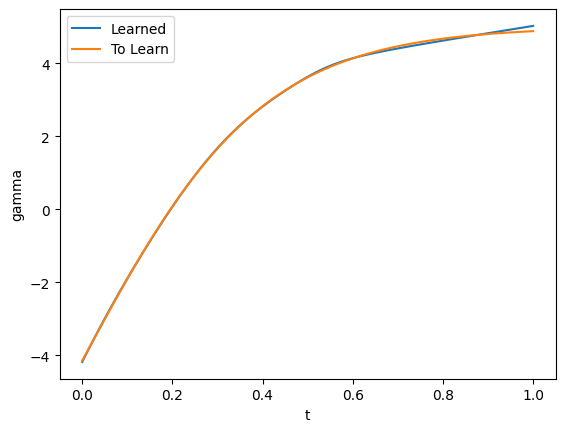

In [36]:
ts_np=utils.to_np(ts)
gamma_np=utils.to_np(gamma_schedule(ts[:,None])[:,0])
plt.plot(ts_np,gamma_np,label='Learned')
plt.plot(ts_np,gamma_overfit,label='To Learn')
plt.legend()
plt.ylabel('gamma')
plt.xlabel('t')
plt.show()